Project 8 : Interpolation, extrapolation, and climate change

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import orth
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline

In [4]:
# High temperatures in Kansas (in Fahrenheit)
WeatherHigh = np.array([37, 44, 55, 66, 75, 84, 89, 88, 80, 69, 53, 41])

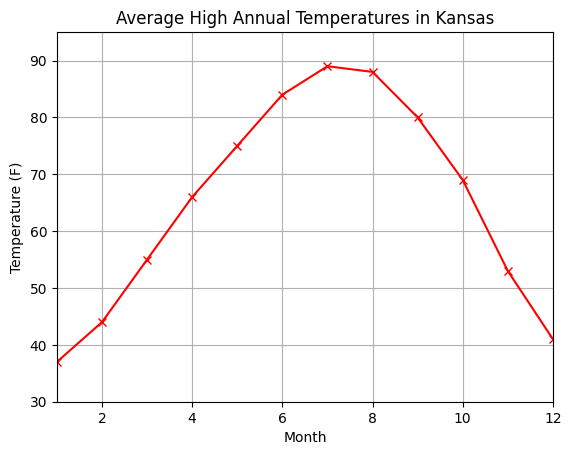

In [5]:
# 1. Plot the temperatures
plt.figure()
plt.plot(range(1, 13), WeatherHigh, 'r-x')
plt.axis([1, 12, 30, 95])
plt.title('Average High Annual Temperatures in Kansas')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()

In [6]:
# 2. Vandermonde Matrix for 4 months
x = np.array([1, 5, 8, 12])
V = np.vander(x, increasing=True)
y = WeatherHigh[[0, 4, 7, 11]]
CoefHigh = np.linalg.solve(V, y)
print("Vandermonde Matrix (V):", V)
print("Coefficients of the cubic polynomial (CoefHigh):", CoefHigh)

Vandermonde Matrix (V): [[   1    1    1    1]
 [   1    5   25  125]
 [   1    8   64  512]
 [   1   12  144 1728]]
Coefficients of the cubic polynomial (CoefHigh): [29.48051948  6.41450216  1.24675325 -0.14177489]


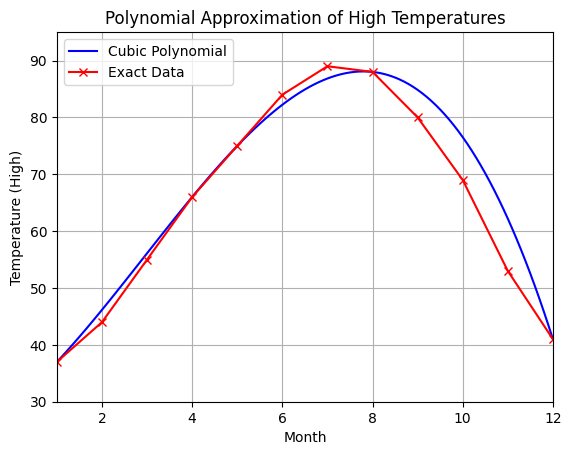

In [7]:
# 3. Evaluate and plot the polynomial
xc = np.arange(1, 12.1, 0.1)
ycHigh = np.polyval(CoefHigh[::-1], xc)
plt.figure()
plt.plot(xc, ycHigh, 'b-', label='Cubic Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 4. Vandermonde Matrix for 6 months
x_six = np.array([1, 3, 5, 8, 10, 12])
y_six = WeatherHigh[x_six - 1]
V_six = np.vander(x_six, increasing=True)
CoefHigh_six = np.linalg.solve(V_six, y_six)
print("Vandermonde Matrix for six months (V_six):", V_six)
print("Coefficients of the 5th degree polynomial (CoefHigh_six):", CoefHigh_six)

Vandermonde Matrix for six months (V_six): [[     1      1      1      1      1      1]
 [     1      3      9     27     81    243]
 [     1      5     25    125    625   3125]
 [     1      8     64    512   4096  32768]
 [     1     10    100   1000  10000 100000]
 [     1     12    144   1728  20736 248832]]
Coefficients of the 5th degree polynomial (CoefHigh_six): [ 2.51341991e+01  1.49771284e+01 -4.19289322e+00  1.21778499e+00
 -1.41305916e-01  5.08658009e-03]


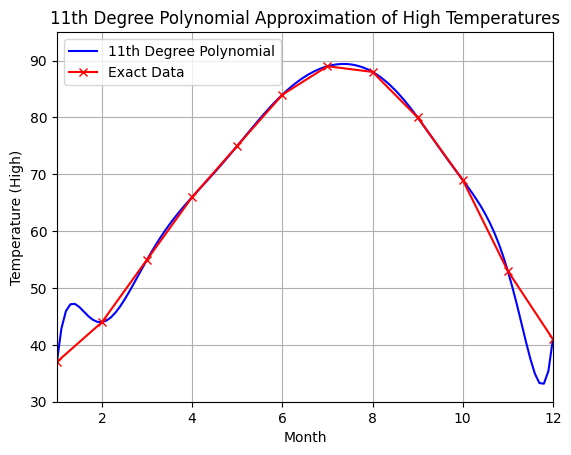

In [9]:
# 5. Polynomial approximation for all months
x_all = np.arange(1, 13)
y_all = WeatherHigh
V_all = np.vander(x_all, increasing=True)
CoefHigh_all = np.linalg.solve(V_all, y_all)
ycHigh_all = np.polyval(CoefHigh_all[::-1], xc)
plt.figure()
plt.plot(xc, ycHigh_all, 'b-', label='11th Degree Polynomial')
plt.plot(range(1, 13), WeatherHigh, 'r-x', label='Exact Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('11th Degree Polynomial Approximation of High Temperatures')
plt.legend()
plt.grid(True)
plt.show()

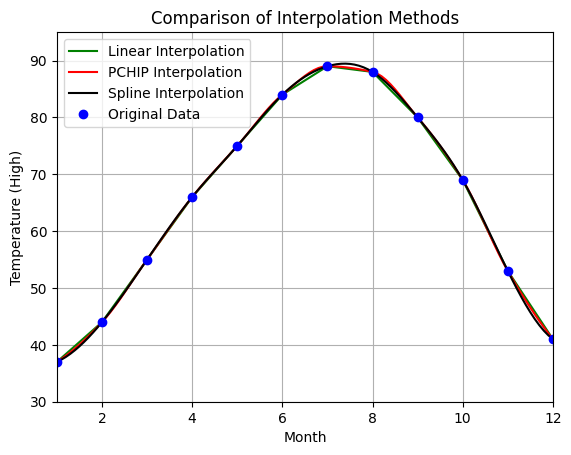

In [10]:
# 6. Interpolation methods comparison
from scipy.interpolate import PchipInterpolator, CubicSpline
xc = np.arange(1, 12.1, 0.1)
ycHigh1 = np.interp(xc, x_all, WeatherHigh)
pchip_interpolator = PchipInterpolator(x_all, WeatherHigh)
ycHigh2 = pchip_interpolator(xc)
spline_interpolator = CubicSpline(x_all, WeatherHigh)
ycHigh3 = spline_interpolator(xc)
plt.figure()
plt.plot(xc, ycHigh1, 'g-', label='Linear Interpolation')
plt.plot(xc, ycHigh2, 'r-', label='PCHIP Interpolation')
plt.plot(xc, ycHigh3, 'k-', label='Spline Interpolation')
plt.plot(x_all, WeatherHigh, 'bo', label='Original Data')
plt.axis([1, 12, 30, 95])
plt.xlabel('Month')
plt.ylabel('Temperature (High)')
plt.title('Comparison of Interpolation Methods')
plt.legend()
plt.grid(True)
plt.show()

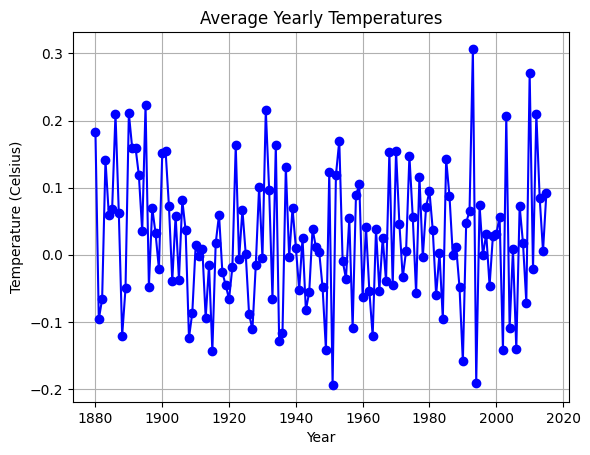

In [11]:
# 7-19. Extrapolation and climate change prediction
data = {
    'years': np.arange(1880, 2016),
    'temp': np.random.randn(136) * 0.1 + 0.0244
}
years = data['years']
temp = data['temp']
plt.figure()
plt.plot(years, temp, 'b-o')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Yearly Temperatures')
plt.grid(True)
plt.show()

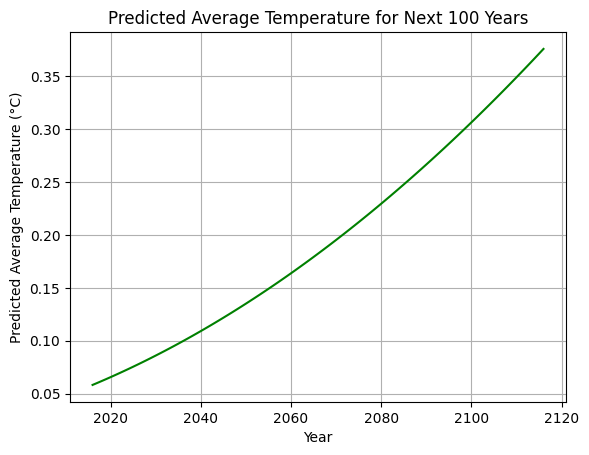

Predicted average temperature for 2116: 0.38 °C


In [12]:
# Projection and future prediction
m = len(years)
B3 = np.column_stack((np.ones(m), years, years**2))
Q3 = np.linalg.qr(B3)[0]
P3 = Q3 @ Q3.T
temp3 = P3 @ temp
futureyears = np.arange(2016, 2117)
interp_func = interp1d(years, temp3, kind='cubic', fill_value='extrapolate')
futuretemp3 = interp_func(futureyears)
plt.figure()
plt.plot(futureyears, futuretemp3, 'g-')
plt.xlabel('Year')
plt.ylabel('Predicted Average Temperature (°C)')
plt.title('Predicted Average Temperature for Next 100 Years')
plt.grid()
plt.show()
print(f'Predicted average temperature for 2116: {futuretemp3[-1]:.2f} °C')